# Unsupervised Learning with Tensorflow

## Principle of Dimensionality Reduction

Using Autoencoders to remove "noisy dimensions" in our dataset to be able to extract hidden features.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

2023-03-24 10:57:19.239063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# global variables
SEED = 42

In [55]:
# create random feature blobs
data = make_blobs(n_samples=300,
                 n_features=2,
                 centers=2,
                 cluster_std=1.0,
                 random_state=SEED)

X, y = data

In [56]:
# create random dataset
np.random.seed(seed=SEED)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [57]:
# combine data into single dataframe
features = pd.DataFrame(X)
features = pd.concat([features,z_noise], axis=1)
features.columns = ['X1', 'X2', 'Xnoise']

# this generated a dataframe with 3 colums for our data:
print(features.head())

         X1        X2    Xnoise
0  4.978375  1.557882  0.496714
1  5.278471  0.311650 -0.138264
2 -2.522695  7.956575  0.647689
3  5.186976  1.770977  1.523030
4  4.929654  4.048570 -0.234153


|    | X1 | X2 | Xnoise |
| -- | -- | -- | -- |
| 0 | -7.338988 | -7.729954 | 0.496714 |
| 1 | -7.740041 | -7.264665 | -0.138264 |
| 2 | -1.686653 | 7.793442 | 0.647689 |
| 3 | 4.422198 | 3.071947 | 1.523030 |
| 4 | -8.917752 | -7.888196 | -0.234153 |

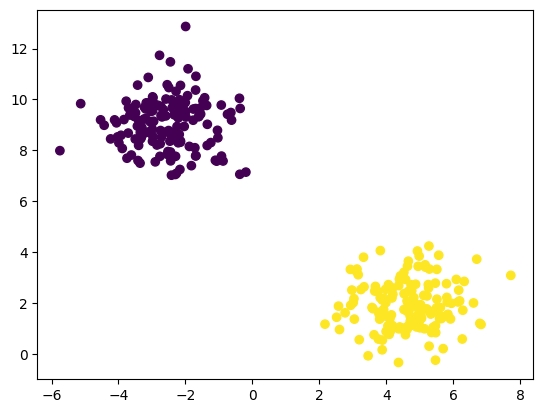

In [24]:
# plotting Y=f(x) shows 2 distinct features
plt.scatter(features['X1'], features['X2'], c=y)

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_01.png)

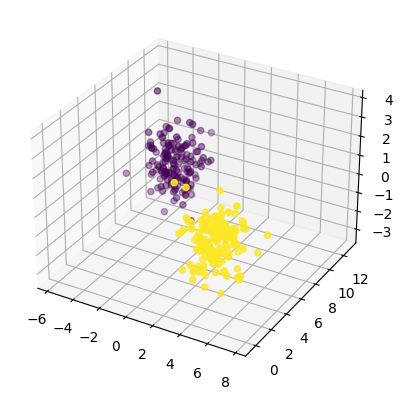

In [25]:
# add a third dimension from the noise data
# this noisy dimension(s) are supposed to
# make it more difficult to see the underlying
# 2 features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'], features['X2'], features['Xnoise'], c=y)

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_02.png)

In [26]:
# normalize the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# this generated a dataframe with 3 colums for our data:
print(scaled_data[:5])

[[0.79654475 0.14297259 0.52692164]
 [0.81882488 0.04853079 0.4374124 ]
 [0.23964038 0.62787751 0.54820363]
 [0.81203198 0.15912134 0.67159543]
 [0.7929275  0.33172162 0.42389547]]


```py
array([[0.123409  , 0.0694226 , 0.52692164],
       [0.09881332, 0.09166767, 0.4374124 ],
       [0.4700545 , 0.81158342, 0.54820363],
       [0.84469708, 0.58585258, 0.67159543],
       [0.02658684, 0.06185718, 0.42389547]])
```

### Build the Autoencoder

In [27]:
# build an encoder that reduces dimensionality from 3 => 2
encoder = Sequential([
  Dense(units=2, activation='relu', input_shape=[3])
])

In [28]:
# and an encoder that brings it back up from 2 => 3
decoder = Sequential([
  Dense(units=3, activation='relu', input_shape=[2])
])

In [29]:
# compile both layers into the autoencoder model
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

### Train the Autoencoder

In [30]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1613
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0789
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0847


In [31]:
# The encoder now reduces the dimensions of our dataset to 2
# when we run predictions from the encoder we will get
# 2-dimensional results that should have stripped the 
# noisy 3rd dimension we added
encoded_2dim = encoder.predict(scaled_data)
# (300, 2) <= (300, 3)
print(encoded_2dim.shape, scaled_data.shape)
encoded_2dim

10/10 [==============================] - 0s 847us/step
(300, 2) (300, 3)


array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.66064113, 0.        ],
       [0.        , 0.        ],
       [0.01190625, 0.        ],
       [0.04541501, 0.        ],
       [0.66456926, 0.        ],
       [0.02558196, 0.        ],
       [0.74877465, 0.        ],
       [0.67108595, 0.        ],
       [0.7078218 , 0.        ],
       [0.78455067, 0.        ],
       [0.59742844, 0.        ],
       [0.6396572 , 0.        ],
       [0.        , 0.        ],
       [0.7568008 , 0.        ],
       [0.        , 0.        ],
       [0.66181535, 0.        ],
       [0.7457948 , 0.        ],
       [0.50829726, 0.        ],
       [0.8560304 , 0.        ],
       [0.66787976, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.75565827, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.6645436 , 0.        ],
       [0.

### Visualize the Results

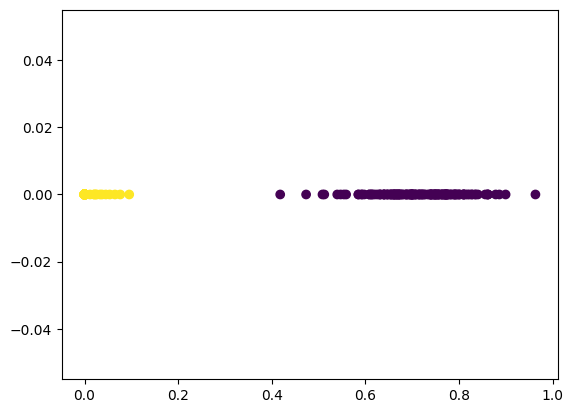

In [32]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)
# the encoder simplified our dataset and extracted 2 clearly
# defined features that might have been obfuscated by the
# extra dimensions in our dataset

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_03.png)

In [35]:
decoded_2to3dim = autoencoder.predict(scaled_data)
print(decoded_2to3dim.shape, scaled_data.shape)
#  (300, 3) <= (300, 2) <= (300, 3)
decoded_2to3dim

10/10 [==============================] - 0s 1ms/step
(300, 3) (300, 3)


array([[0.79212826, 0.14791425, 0.        ],
       [0.79212826, 0.14791425, 0.        ],
       [0.31931612, 0.6261396 , 0.        ],
       [0.79212826, 0.14791425, 0.        ],
       [0.7836071 , 0.15653294, 0.        ],
       [0.7596253 , 0.18078929, 0.        ],
       [0.3165048 , 0.6289831 , 0.        ],
       [0.77381957, 0.16643253, 0.        ],
       [0.25624013, 0.6899377 , 0.        ],
       [0.31184092, 0.6337004 , 0.        ],
       [0.28554958, 0.66029274, 0.        ],
       [0.2306357 , 0.7158353 , 0.        ],
       [0.3645566 , 0.58038116, 0.        ],
       [0.33433405, 0.6109497 , 0.        ],
       [0.79212826, 0.14791425, 0.        ],
       [0.25049597, 0.6957477 , 0.        ],
       [0.79212826, 0.14791425, 0.        ],
       [0.31847575, 0.62698954, 0.        ],
       [0.25837278, 0.6877806 , 0.        ],
       [0.42834663, 0.5158608 , 0.        ],
       [0.17947859, 0.76757807, 0.        ],
       [0.31413555, 0.6313795 , 0.        ],
       [0.

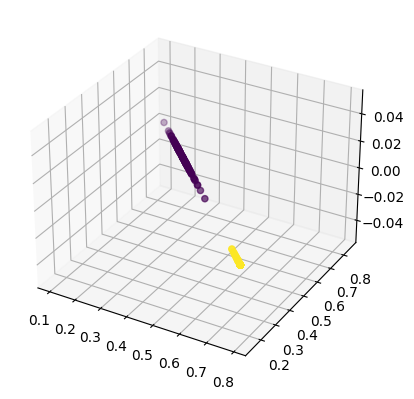

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(decoded_2to3dim[:,0], decoded_2to3dim[:,1], decoded_2to3dim[:,2], c=y)

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_04.png)

## Autoencoders for Image Data

Create a noisy version of the MNIST digits dataset and train an autoencoder to generate de-noised images from this source.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

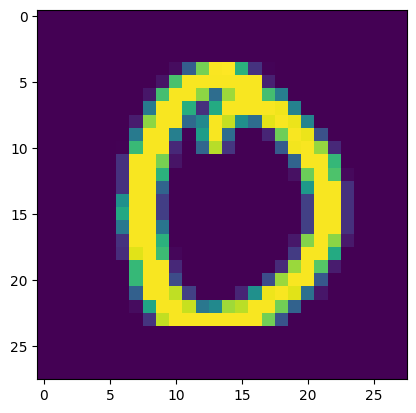

In [41]:
plt.imshow(X_train[88])

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_05.png)

In [4]:
# normalize images
X_train = X_train/255
X_test = X_test/255

### Building the Autoencoder

The dataset starts out with 28*28 px images = 784 dimensions. The Encoder should now, several times over several layers, approx. cut this number in half until a minimum of dimensions is reached in a hidden layer.


The following Decoder should then take those reduced feature maps and reconstruct the original image from it. By validating the against the original, not noisy images we should be able to train the Autoencoder to denoise images.


Let's get started by an autoencoder that can read the original image, reduces it to ~3% and then reconstruct the original image from this state:

In [45]:
encoder = Sequential([
    # generate (28, 28) => (784) shape
    Flatten(input_shape=[28, 28], name='input_layer'),
    # cut dimensions in half 
    Dense(units=392, activation='relu', name="reducer50"),
    # cut dimensions in half 
    Dense(units=196, activation='relu', name="reducer25"),
    # cut dimensions in half 
    Dense(units=98, activation='relu', name="reducer12"),
    # cut dimensions in half 
    Dense(units=49, activation='relu', name="reducer6"),
    # cut dimensions in ~ half 
    Dense(units=24, activation='relu', name='hidden_layer')
])

In [48]:
decoder = Sequential([
    Dense(units=49, activation='relu', input_shape=[24], name='expander6'),
    Dense(units=98, activation='relu', name='expander12'),
    Dense(units=98, activation='relu', name='expander25'),
    Dense(units=392, activation='relu', name='expander50'),
    Dense(units=784, activation='sigmoid', name='expander100'),
    Reshape([28, 28], name='output_layer')
])

In [58]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss='binary_crossentropy',
#                    optimizer=SGD(learning_rate=1.5),
                    optimizer=Adam(learning_rate=1e-3),
                    metrics=['accuracy'])

In [62]:
tf.random.set_seed(SEED)
# fit the autoencoder to training dataset
autoencoder.fit(X_train, X_train, epochs=25,
               validation_data=[X_test, X_test])

# Epoch 25/25
# 6s 3ms/step - loss: 0.0898 - accuracy: 0.3063 - val_loss: 0.0923 - val_accuracy: 0.2968

Epoch 1/25


2023-03-23 14:57:26.595075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-23 14:57:26.596761: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1875/1875 [==============================] - 9s 3ms/step - loss: 0.1098 - accuracy: 0.2607 - val_loss: 0.1092 - val_accuracy: 0.2617
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.2653 - val_loss: 0.1068 - val_accuracy: 0.2657
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1055 - accuracy: 0.2690 - val_loss: 0.1051 - val_accuracy: 0.2669
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1037 - accuracy: 0.2725 - val_loss: 0.1034 - val_accuracy: 0.2722
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.2756 - val_loss: 0.1027 - val_accuracy: 0.2711
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1007 - accuracy: 0.2790 - val_loss: 0.1011 - val_accuracy: 0.2741
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0995 - accuracy: 0.2812 - val_loss: 0.1002 - val_accuracy: 0.2741
Epo

### Run Predictions

In [69]:
# get 10 sample predictions from testing dataset
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 18ms/step


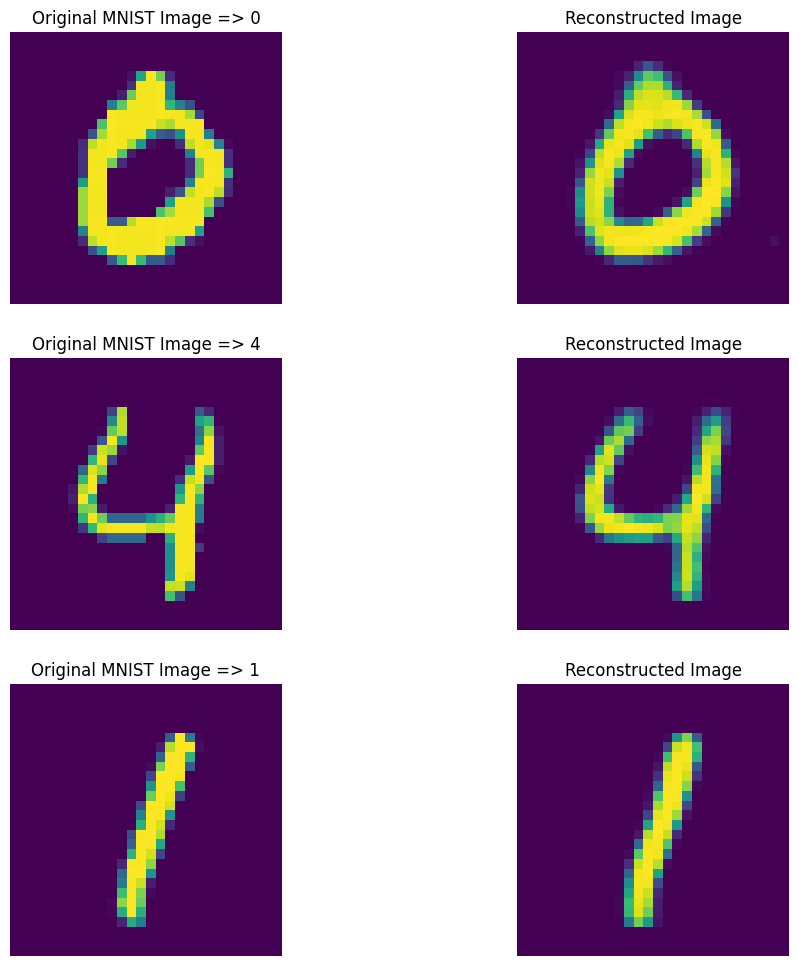

In [78]:
# select 3 images out of 10 samples
n = [3, 4, 5]

plt.figure(figsize=(12, 12))
# ROW 1
plt.subplot(3, 2, 1)
plt.title(f"Original MNIST Image => {y_test[n[0]]}")
plt.axis(False)
plt.imshow(X_test[n[0]])
plt.subplot(3, 2, 2)
plt.title("Reconstructed Image")
plt.axis(False)
plt.imshow(passed_images[n[0]])
# ROW 2
plt.subplot(3, 2, 3)
plt.title(f"Original MNIST Image => {y_test[n[1]]}")
plt.axis(False)
plt.imshow(X_test[n[1]])
plt.subplot(3, 2, 4)
plt.title("Reconstructed Image")
plt.axis(False)
plt.imshow(passed_images[n[1]])
# ROW 3
plt.subplot(3, 2, 5)
plt.title(f"Original MNIST Image => {y_test[n[2]]}")
plt.axis(False)
plt.imshow(X_test[n[2]])
plt.subplot(3, 2, 6)
plt.title("Reconstructed Image")
plt.axis(False)
plt.imshow(passed_images[n[2]])

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_06.png)

## Autoencoders for Noise Removal

In [6]:
# generating noise
sample = GaussianNoise(0.2)
noisy = sample(X_train[:10], training=True)

2023-03-24 10:59:13.110958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-24 10:59:13.311340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-24 10:59:13.312026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-24 10:59:13.315244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow w

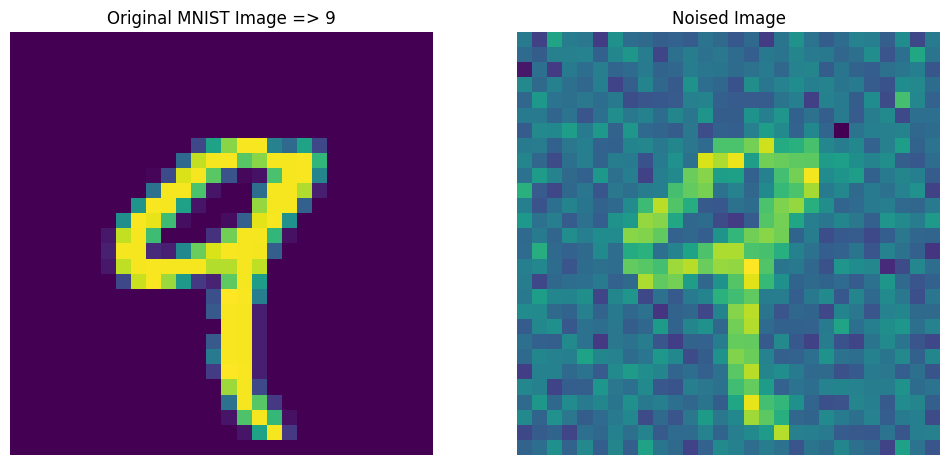

In [9]:
n = 4

plt.figure(figsize=(12, 12))
# ROW 1
plt.subplot(1, 2, 1)
plt.title(f"Original MNIST Image => {y_train[n]}")
plt.axis(False)
plt.imshow(X_train[n])
plt.subplot(1, 2, 2)
plt.title("Noised Image")
plt.axis(False)
plt.imshow(noisy[n])

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_07.png)

### Build the Denoise Autoencoder

In [11]:
tf.random.set_seed(SEED)

encoder = Sequential([
    # generate (28, 28) => (784) shape
    Flatten(input_shape=[28, 28], name='input_layer'),
    
    # add noise to source image
    GaussianNoise(0.2),
    
    # cut dimensions in half 
    Dense(units=392, activation='relu', name="reducer50"),
    # cut dimensions in half 
    Dense(units=196, activation='relu', name="reducer25"),
    # cut dimensions in half 
    Dense(units=98, activation='relu', name="reducer12"),
    # cut dimensions in half 
    Dense(units=49, activation='relu', name="reducer6"),
    # cut dimensions in ~ half 
    Dense(units=24, activation='relu', name='hidden_layer')
])

In [12]:
decoder = Sequential([
    Dense(units=49, activation='relu', input_shape=[24], name='expander6'),
    Dense(units=98, activation='relu', name='expander12'),
    Dense(units=98, activation='relu', name='expander25'),
    Dense(units=392, activation='relu', name='expander50'),
    Dense(units=784, activation='sigmoid', name='expander100'),
    Reshape([28, 28], name='output_layer')
])

In [13]:
noise_remover = Sequential([encoder, decoder])

noise_remover.compile(loss='binary_crossentropy',
                     optimizer=Adam(learning_rate=1e-3),
                     metrics=['accuracy'])

In [14]:
noise_remover.fit(X_train, X_train, epochs=25,
               validation_data=[X_test, X_test])

# Epoch 25/25
# 6s 3ms/step - loss: 0.0946 - accuracy: 0.2949 - val_loss: 0.0913 - val_accuracy: 0.2986

Epoch 1/25


2023-03-24 11:10:24.796880: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f1dac2ba910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-24 11:10:24.796907: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-03-24 11:10:24.830848: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-24 11:10:24.840086: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-03-24 11:10:25.151157: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 11s 3ms/step - loss: 0.1736 - accuracy: 0.1784 - val_loss: 0.1354 - val_accuracy: 0.2195
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1326 - accuracy: 0.2328 - val_loss: 0.1237 - val_accuracy: 0.2402
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1249 - accuracy: 0.2436 - val_loss: 0.1175 - val_accuracy: 0.2507
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1190 - accuracy: 0.2518 - val_loss: 0.1130 - val_accuracy: 0.2606
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1154 - accuracy: 0.2575 - val_loss: 0.1104 - val_accuracy: 0.2597
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1127 - accuracy: 0.2612 - val_loss: 0.1078 - val_accuracy: 0.2632
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1100 - accuracy: 0.2655 - val_loss: 0.1060 - val_accuracy: 0.2622
Ep

### Run Denoiser

In [15]:
noisy_samples = sample(X_test[:3], training=True)

denoised_samples = noise_remover(noisy_samples)

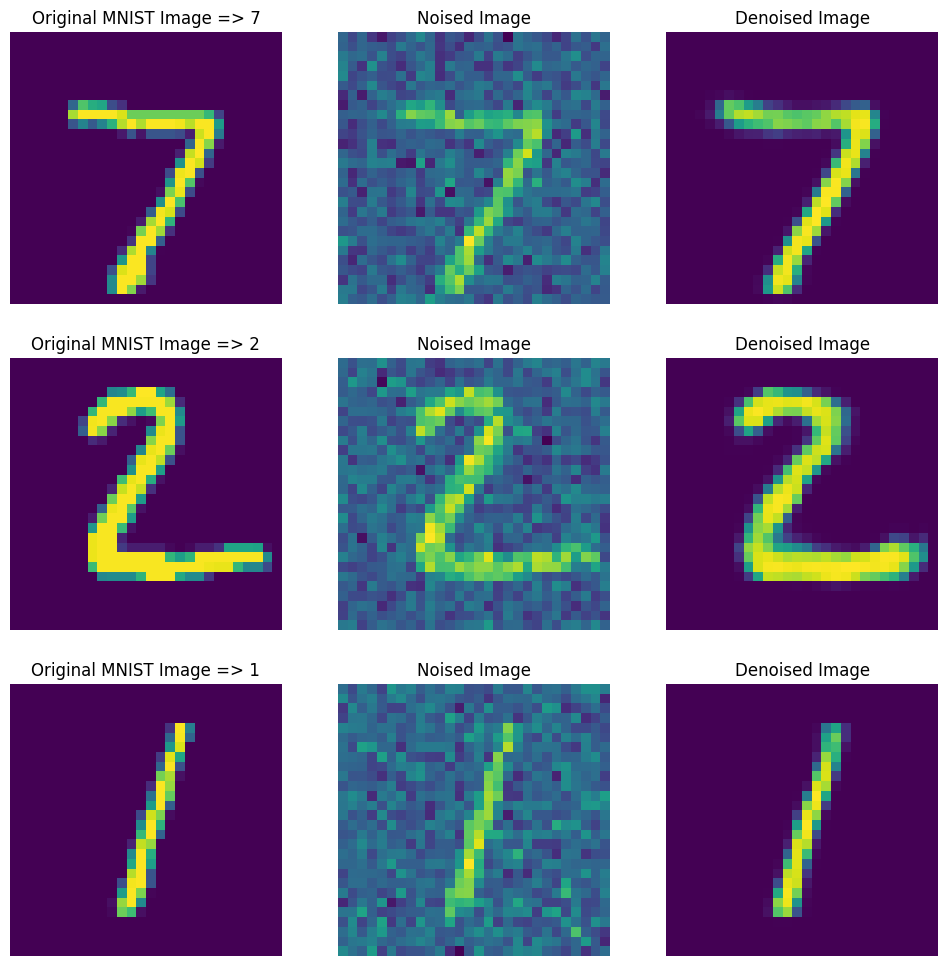

In [16]:
# plot results
plt.figure(figsize=(12, 12))
# ROW 1
plt.subplot(3, 3, 1)
plt.title(f"Original MNIST Image => {y_test[0]}")
plt.axis(False)
plt.imshow(X_test[0])
plt.subplot(3, 3, 2)
plt.title("Noised Image")
plt.axis(False)
plt.imshow(noisy_samples[0])
plt.subplot(3, 3, 3)
plt.title("Denoised Image")
plt.axis(False)
plt.imshow(denoised_samples[0])
# ROW 2
plt.subplot(3, 3, 4)
plt.title(f"Original MNIST Image => {y_test[1]}")
plt.axis(False)
plt.imshow(X_test[1])
plt.subplot(3, 3, 5)
plt.title("Noised Image")
plt.axis(False)
plt.imshow(noisy_samples[1])
plt.subplot(3, 3, 6)
plt.title("Denoised Image")
plt.axis(False)
plt.imshow(denoised_samples[1])
# ROW 3
plt.subplot(3, 3, 7)
plt.title(f"Original MNIST Image => {y_test[2]}")
plt.axis(False)
plt.imshow(X_test[2])
plt.subplot(3, 3, 8)
plt.title("Noised Image")
plt.axis(False)
plt.imshow(noisy_samples[2])
plt.subplot(3, 3, 9)
plt.title("Denoised Image")
plt.axis(False)
plt.imshow(denoised_samples[2])

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_08.png)

## Food

Variations in preference for different food types in the UK

> `wget https://github.com/emtrujillo-lab/bggn213/blob/3fdf3e1f373545a420de9fb45a2a8e68ee5478fa/Class09/Class9/UK_foods.csv`


#### Prepare the Dataset

In [18]:
df = pd.read_csv('./UK_foods.csv', index_col='Unnamed: 0')
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


|   | England | Wales | Scotland | N.Ireland |
| -- | -- | -- | -- | -- |
| Cheese | 105 | 103 | 103 | 66 |
| Carcass_meat | 245 | 227 | 242 | 267 |
| Other_meat | 685 | 803 | 750 | 586 |
| Fish | 147 | 160 | 122 | 93 |
| Fats_and_oils | 193 | 235 | 184 | 209 |
| Sugars | 156 | 175 | 147 | 139 |
| Fresh_potatoes | 720 | 874 | 566 | 1033 |
| Fresh_Veg | 253 | 265 | 171 | 143 |
| Other_Veg | 488 | 570 | 418 | 355 |
| Processed_potatoes | 198 | 203 | 220 | 187 |
| Processed_Veg | 360 | 365 | 337 | 334 |
| Fresh_fruit | 1102 | 1137 | 957 | 674 |
| Cereals | 1472 | 1582 | 1462 | 1494 |
| Beverages | 57 | 73 | 53 | 47 |
| Soft_drinks | 1374 | 1256 | 1572 | 1506 |
| Alcoholic_drinks | 375 | 475 | 458 | 135 |
| Confectionery | 54 | 64 | 62 | 41 |

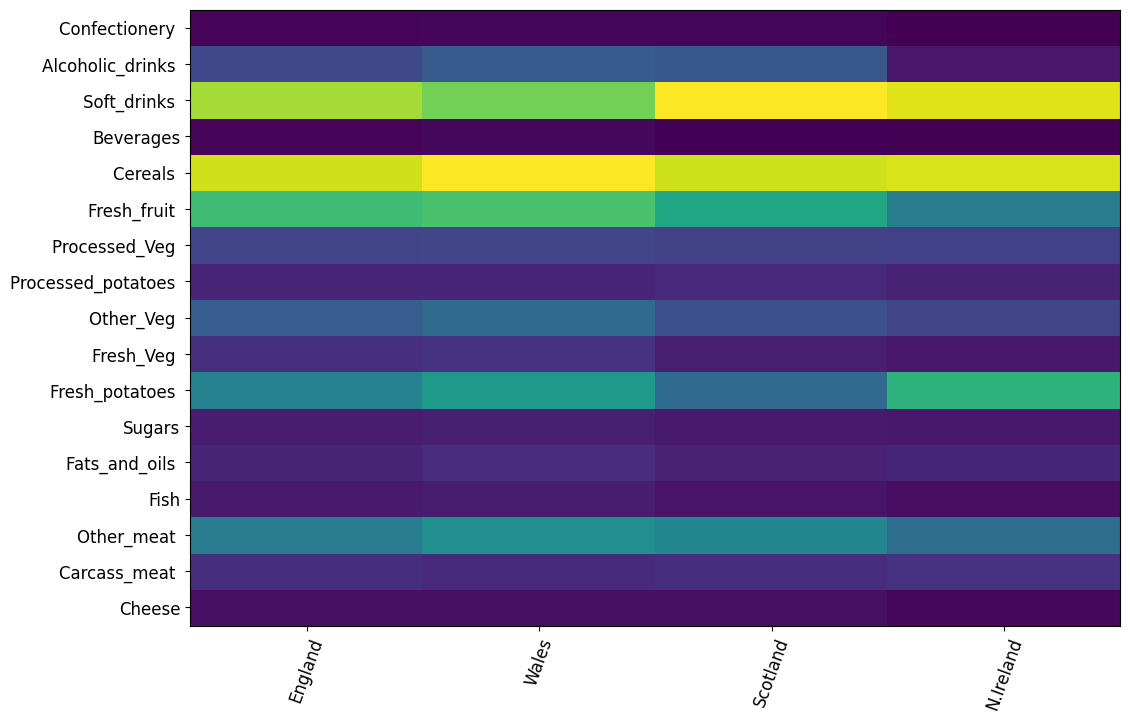

In [33]:
# create a heatmap with pandas
plt.figure(figsize=(12, 8))
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.xticks(rotation=70, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_09.png)

In [19]:
df_t = df.transpose()
df_t

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


|  | Cheese | Carcass_meat | Other_meat | Fish | Fats_and_oils | Sugars | Fresh_potatoes | Fresh_Veg | Other_Veg | Processed_potatoes | Processed_Veg | Fresh_fruit | Cereals | Beverages | Soft_drinks | Alcoholic_drinks | Confectionery |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| England | 105 | 245 | 685 | 147 | 193 | 156 | 720 | 253 | 488 | 198 | 360 | 1102 | 1472 | 57 | 1374 | 375 | 54 |
| Wales | 103 | 227 | 803 | 160 | 235 | 175 | 874 | 265 | 570 | 203 | 365 | 1137 | 1582 | 73 | 1256 | 475 | 64 |
| Scotland | 103 | 242 | 750 | 122 | 184 | 147 | 566 | 171 | 418 | 220 | 337 | 957 | 1462 | 53 | 1572 | 458 | 62 |
| N.Ireland | 66 | 267 | 586 | 93 | 209 | 139 | 1033 | 143 | 355 | 187 | 334 | 674 | 1494 | 47 | 1506 | 135 | 41 |

<AxesSubplot: >

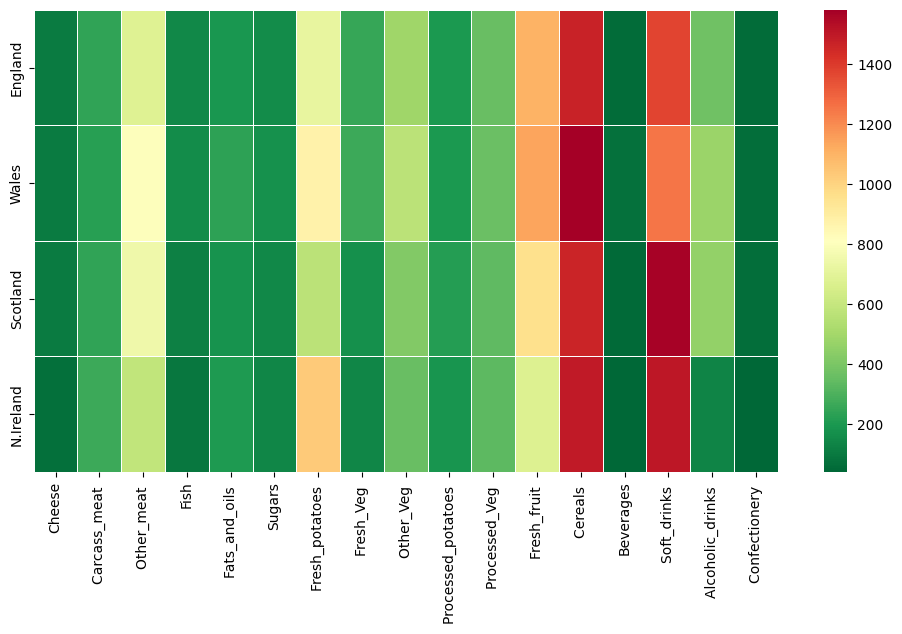

In [36]:
# create a heatmap with seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(df_t, cmap='RdYlGn_r', linewidths=0.5, annot=False)

![Unsupervised Learning with Tensorflow](../assets/05_Tensorflow_Unsupervised_Learning_10.png)

### Use an Autoencoder to separate Features

In [41]:
# build the autoencoder
encoder = Sequential([
    Dense(units=8, activation='relu', input_shape=[17]),
    Dense(units=4, activation='relu'),
    Dense(units=2, activation='relu')
])

decoder = Sequential([
    Dense(units=4, activation='relu', input_shape=[2]),
    Dense(units=8, activation='relu'),
    Dense(units=17, activation='relu')
])

autoencoder= Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=Adam(learning_rate=1e-3))

In [42]:
# normalize input data
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df_t.values)
scaled_df.shape
# (4, 17)

(4, 17)

In [43]:
autoencoder.fit(scaled_df, scaled_df, epochs=25)
# Epoch 25/25
# 1/1 [==============================] - 0s 5ms/step - loss: 0.2891

Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 0.3545
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3513
Epoch 3/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3482
Epoch 4/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3451
Epoch 5/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3420
Epoch 6/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3390
Epoch 7/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3360
Epoch 8/25
1/1 [==============================] - 0s 6ms/step - loss: 0.3330
Epoch 9/25
1/1 [==============================] - 0s 6ms/step - loss: 0.3301
Epoch 10/25
1/1 [==============================] - 0s 6ms/step - loss: 0.3272
Epoch 11/25
1/1 [==============================] - 0s 6ms/step - loss: 0.3243
Epoch 12/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3215
Epoch 13/25
1/1 [==============================] - 0s 5ms/step - loss: 0.3

In [44]:
# get reduced dimensionality output from encoder
encoded_2dim = encoder.predict(scaled_df)
encoded_2dim

# array([[0.        , 1.8262266 ],
#        [0.        , 3.4182868 ],
#        [0.        , 1.7019984 ],
#        [0.20801371, 0.52220476]], dtype=float32)

1/1 [==============================] - 0s 59ms/step


array([[0.        , 1.8262266 ],
       [0.        , 3.4182868 ],
       [0.        , 1.7019984 ],
       [0.20801371, 0.52220476]], dtype=float32)

In [46]:
results = pd.DataFrame(data=encoded_2dim,
                      index=df_t.index,
                      columns=['C1', 'C2'])

results.reset_index()

,index,C1,C2
0,England,0.000000,1.826227
1,Wales,0.000000,3.418287
2,Scotland,0.000000,1.701998
3,N.Ireland,0.208014,0.522205


|  | index | C1 | C2 |
| -- | -- | -- | -- |
| 0 | England | 0.000000 | 1.826227 |
| 1 | Wales | 0.000000 | 3.418287 |
| 2 | Scotland | 0.000000 | 1.701998 |
| 3 | N.Ireland | 0.208014 | 0.522205 |

<AxesSubplot: xlabel='C1', ylabel='C2'>

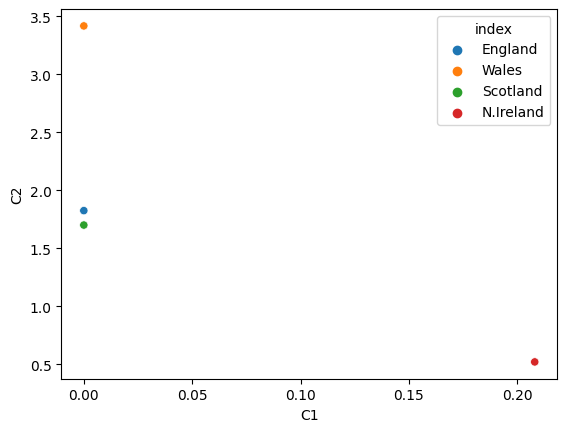

In [47]:
sns.scatterplot(x='C1', y='C2', data=results.reset_index(), hue='index')

# England and Scotland are very close to each other
# while Wales and N.Ireland 